In [9]:
#Import packages
import numpy as np
from keras.layers import *
from keras.models import *
from keras.datasets import mnist
from keras.optimizers import RMSprop
import keras.backend as K
import matplotlib.pyplot as plt
from functools import partial
import glob
import os

In [10]:
# Set the path to the directory containing the array files
dir_path = "C:\\NetHack\\sys\\windows\\vs\\NetHackW\\levels"

x_train = []

# Set the number of rows and columns for the array
rows = 21
cols = 80

# Get a list of all files in the directory with the .bin extension
file_list = glob.glob(os.path.join(dir_path, "level_data_*.bin"))

# Loop through the file list and save each plot image as a PNG file
for file_path in file_list:
    # Read the array from the file
    arr = np.fromfile(file_path, dtype=np.uint8).reshape((rows, cols))

    # Determine the longest dimension of the rectangular image
    max_dim = 80

    # Pad the array to make it square using the last value of the array
    pad_width = ((0, max_dim - arr.shape[0]), (0, max_dim - arr.shape[1]))
    arr_padded = np.pad(arr, pad_width=pad_width, mode='constant', constant_values=arr[-1,-1])
    x_train.append(arr_padded)
    
x_train = np.array(x_train).astype('uint8')


# Add a new dimension with size 1 at the end of x_train
x_train = np.expand_dims(x_train, axis=-1)


print(np.shape(x_train))

(10000, 80, 80, 1)


In [11]:
from tensorflow.keras.models import load_model

# Load the generator model
generator = load_model('AdaIN 80x80 Models\\generator_model_50000.h5')

# Load the discriminator model
discriminator = load_model('AdaIN 80x80 Models\\discriminator_model_50000.h5')

In [12]:
tileset = []

for i in range(0,21):
    for j in range(0,80):
        if x_train[0][i][j] not in tileset:
            tileset.append(x_train[0][i][j])
            print(x_train[0][i][j][0])
tileset =  np.array(tileset).astype('uint8')
tileset = tileset.reshape(-1)

0
24
15
3
2
14
4
23
25
1
26
5
6


C:\Users\basak\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in ubyte_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\basak\anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  if sys.path[0] == "":


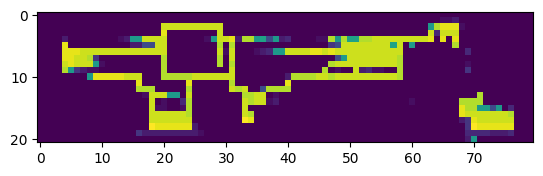

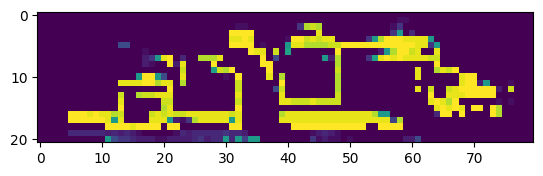

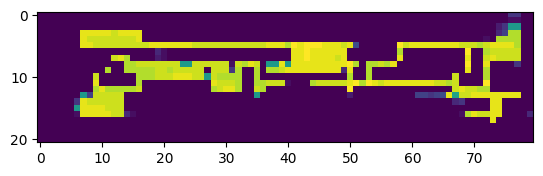

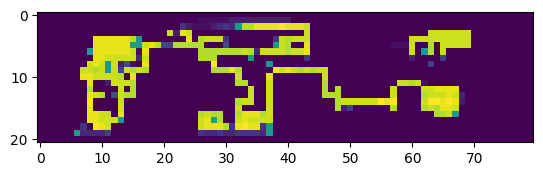

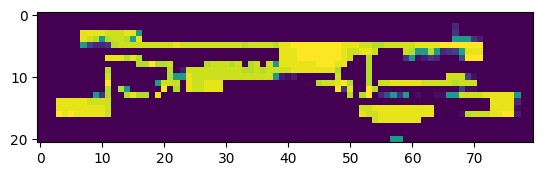

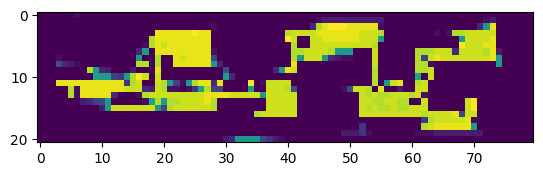

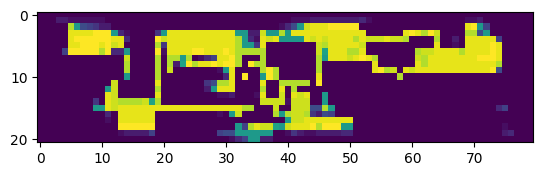

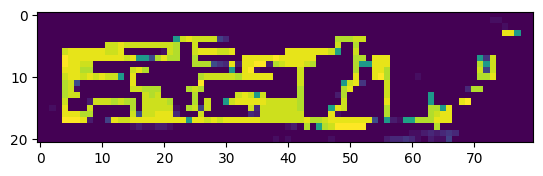

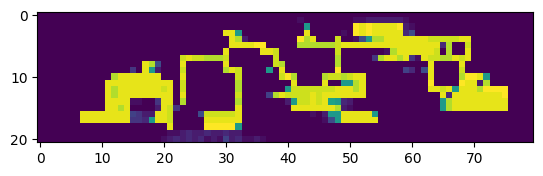

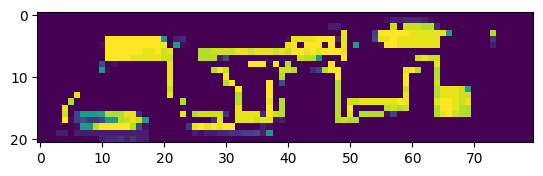

In [13]:
#Show samples
latent_vectors = np.random.normal(0.0, 1.0, [10, 100])
fake_images = generator.predict(latent_vectors)

fakes = []
for i in range(0, 10):
    plt.figure(i)
    a = fake_images[i][:, :, 0]
    a *= 255.0
    a = a.astype('uint8')
    reshaped = a[:21, :80]
    reshaped = post_processing(reshaped)
    fakes.append(reshaped)
    plt.imshow(reshaped)
    #plt.imshow(fake_images[i].reshape([80, 80]))

plt.show()



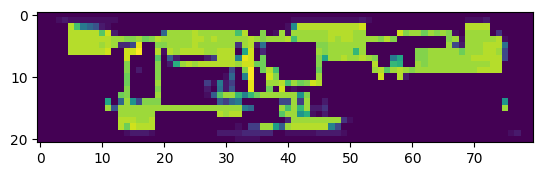

In [6]:
generated = fakes[1]
plt.imshow(generated)
with open('output7.bin', 'wb') as f:
    generated.tofile(f)

In [8]:
def post_processing(level_data):
    for i in range(0,21):
        for j in range(0,80):
            if level_data[i][j] not in tileset:
                level_data[i][j] = find_closest(level_data[i][j], tileset)
    level_data = level_data.astype('uint8') 
    return level_data
def find_closest(value, arr2):
    closest = arr2[0]
    distance = abs(arr2[0] - value)
    for i in arr2:
        dis = abs(i - value)
        if (dis < distance):
            distance = dis
            closest = i
    return closest
           
processed_data = post_processing(fakes[0])
plt.imshow(processed_data)


IndexError: list index out of range

In [8]:
with open('processed_data.bin', 'wb') as f:
    processed_data.tofile(f)